<a href="https://colab.research.google.com/github/jsilva-engineer/coursera-test/blob/master/Projeto_Dados_Python_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importação de bibliotecas:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Upload de arquivo:
from google.colab import files
arq = files.upload()

Saving vgsales.csv to vgsales (1).csv


In [ ]:
#Acesso ao DataFrame:
df = pd.read_csv('vgsales.csv')

In [ ]:
#Visualização das 5 primeiras linhas:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
#Visualização das últimas 5 linhas:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [ ]:
#Mostrar quantidade linhas e colunas
df.shape

(16598, 11)

In [ ]:
#Verificar os tipos de dados
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [ ]:
#Ordenando a coluna 'Year' em ordem crescente:
df.sort_values('Year')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.0,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.0,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.0,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.0,0.00,0.01


In [ ]:
#Exclusão de linhas vazias ou nulas:
df.dropna(inplace=True)

In [ ]:
#Exclusão de coluna desnecessária:
df.drop(columns="Rank",inplace=True)

In [ ]:
#Filtro para anos abaixo de 2017:
df = df[df["Year"]<2017.0]

In [ ]:
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000
mean,2006.402775,0.265695,0.147768,0.078849,0.048437,0.541022
std,5.830382,0.822525,0.509360,0.311916,0.190105,1.567520
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


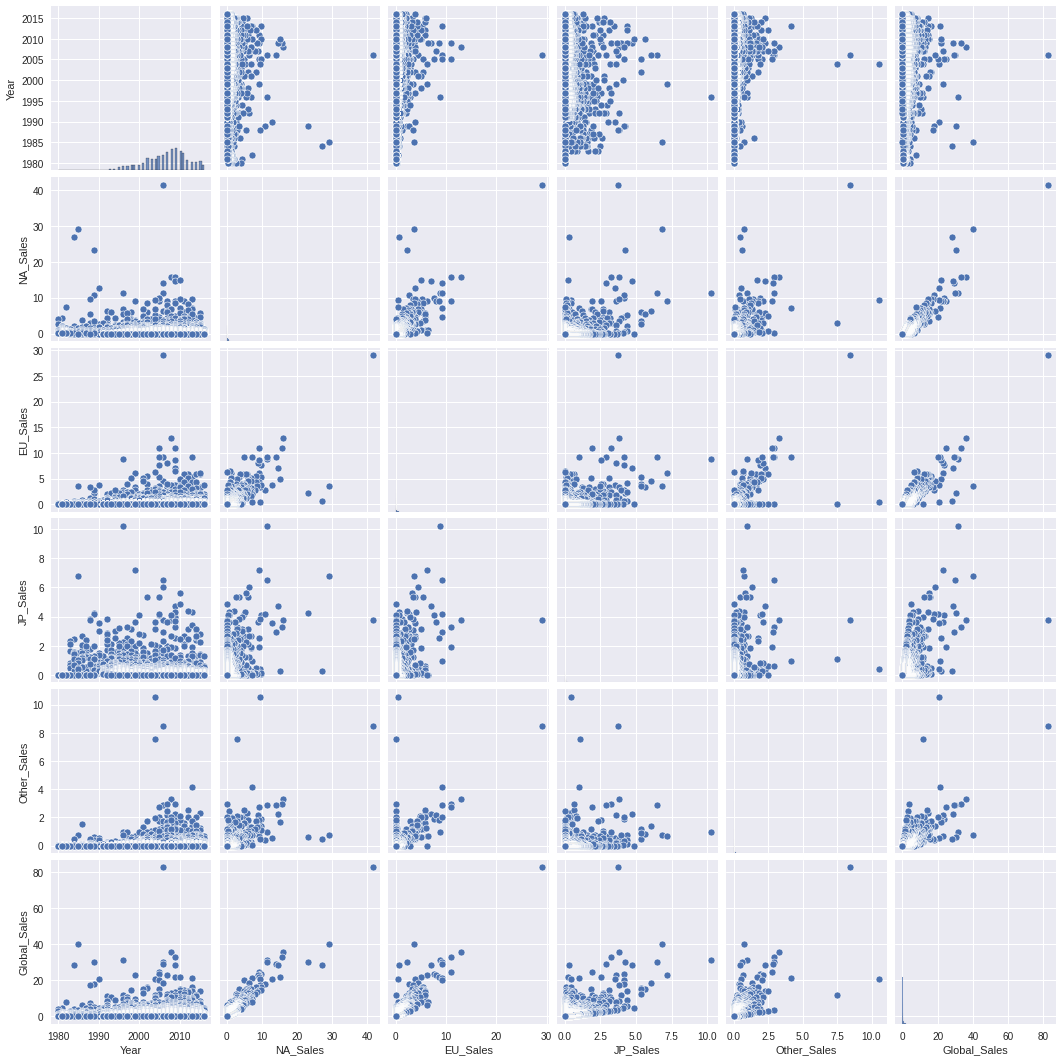

In [ ]:
sns.pairplot(df);

In [ ]:
#Como pode ser visto pelo pairplot:

#As vendas de NA contribuem quase que linearmente nas Vendas Globais

#EU é um gráfico espalhado enquanto JP é uma curva

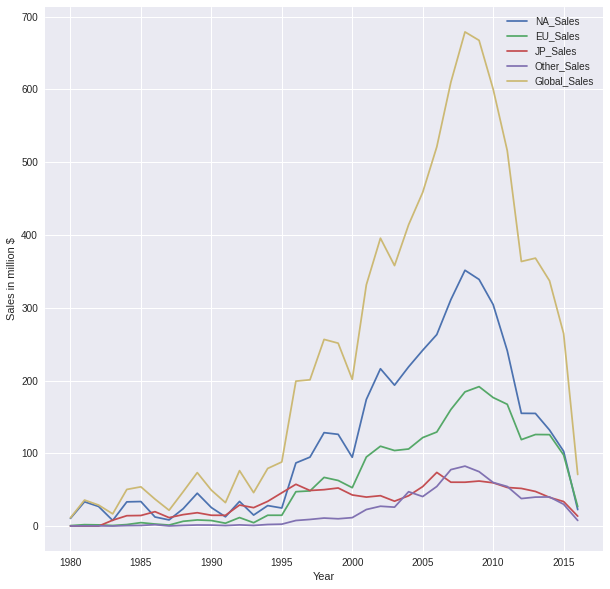

In [ ]:
#Análise Quantitativa:
Data_vg = df.groupby(by  = 'Year').sum()
Data_vg.plot.line(figsize=(10,10), grid="on");
plt.ylabel("Sales in million $");

In [ ]:
#O aumento das vendas ao longo do tempo mostra claramente a elevação do interesse por videogames.

In [ ]:
#Análise Qualitativa
#Jogos mais frequentes:

Data_vg = pd.DataFrame(df["Name"].value_counts().head(5))


In [ ]:
Data_vg

,Name
Need for Speed: Most Wanted,12
FIFA 14,9
LEGO Marvel Super Heroes,9
Ratatouille,9
LEGO Jurassic World,8


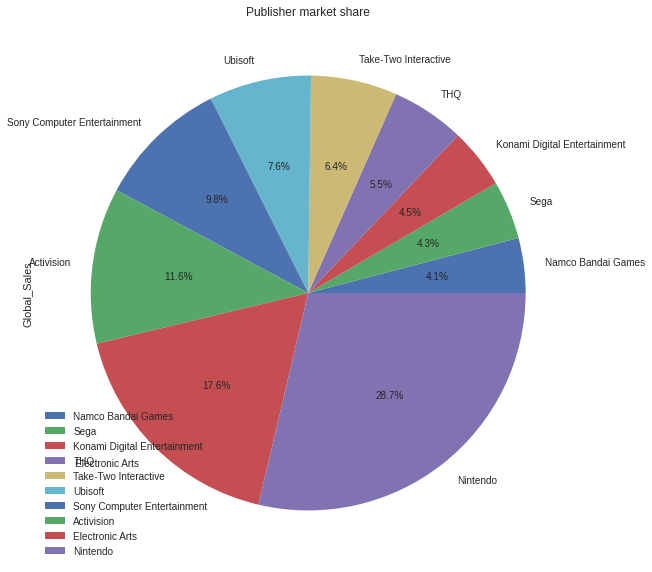

In [ ]:
#Os maiores fabricantes de jogos:
df1 = pd.DataFrame(df.groupby('Publisher')['Global_Sales'].sum())
df1.sort_values(by=['Global_Sales'], inplace=True)
df1 = df1.tail(10)
plot = df1.plot.pie(y='Global_Sales', autopct='%1.1f%%', figsize=(10, 10))
plt.title("Publisher market share");

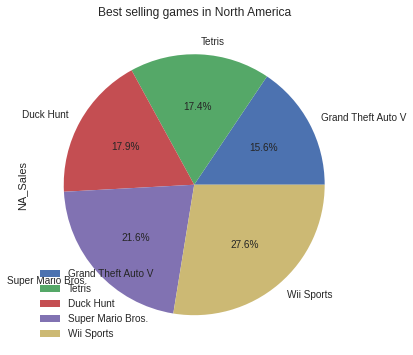

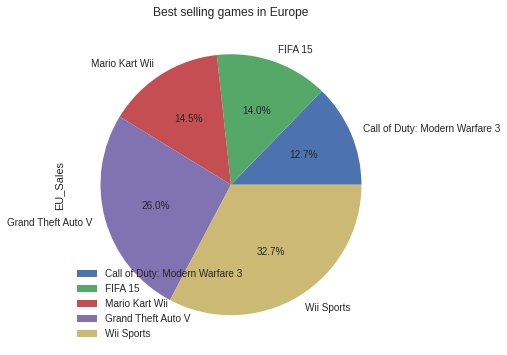

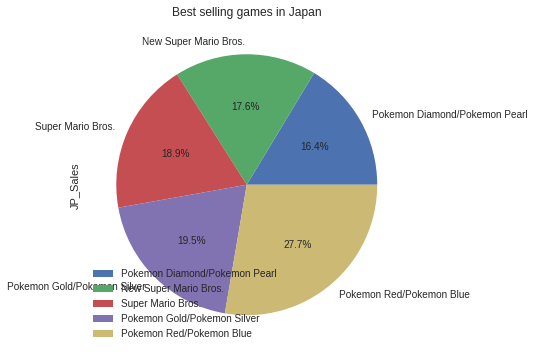

In [ ]:
#Os jogos mais vendidos por região:

df1 = pd.DataFrame(df.groupby('Name')['NA_Sales'].sum())
df1.sort_values(by=['NA_Sales'], inplace=True)
df1 = df1.tail(5)
df1.plot.pie(y='NA_Sales', autopct='%1.1f%%', figsize=(6, 6))
plt.title("Best selling games in North America");

df1 = pd.DataFrame(df.groupby('Name')['EU_Sales'].sum())
df1.sort_values(by=['EU_Sales'], inplace=True)
df1 = df1.tail(5)
df1.plot.pie(y='EU_Sales', autopct='%1.1f%%', figsize=(6, 6))
plt.title("Best selling games in Europe");

df1 = pd.DataFrame(df.groupby('Name')['JP_Sales'].sum())
df1.sort_values(by=['JP_Sales'], inplace=True)
df1 = df1.tail(5)
df1.plot.pie(y='JP_Sales', autopct='%1.1f%%', figsize=(6, 6))
plt.title("Best selling games in Japan");

In [ ]:
df.to_csv('vgsales_novo.csv', index=False)

In [ ]:
df.to_excel('vgsales_novo.xlsx', index=False)